# 1. Подготовка данных:

• Найти и выбрать набор данных для решения задачи
классификации (учитывая, что в группе не должно быть
повторяющихся наборов данных).

• Провести предобработку данных: устранить пропуски,
нормализовать или стандартизировать данные, если это
необходимо.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve, auc, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.preprocessing import LabelBinarizer



df = pd.read_csv('miami-housing.csv', sep=',')
df.head()

# Выбираем числовые столбцы для дальнейшей обработки
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Инициализация стандартизатора (StandardScaler)
scaler = StandardScaler()

# Применяем стандартизацию к числовым столбцам (преобразуем данные так, чтобы у них был средний = 0 и стандартное отклонение = 1)
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)

# Отображение первых строк стандартизированных данных
df_scaled.head()

FileNotFoundError: [Errno 2] No such file or directory: 'miami-housing.csv'

# 2. Реализация моделей классификации:
• Реализовать следующие алгоритмы классификации:

• Логистическая регрессия

• Метод k-ближайших соседей

• Метод опорных векторов (SVM)

• Разделить набор данных на обучающую и тестовую выборки
(например, 70% на обучение, 30% на тестирование).


In [ ]:
# Преобразование целевой переменной 'SALE_PRC' в категории (например, низкий, средний, высокий)
# Разделим 'SALE_PRC' на три категории на основе квантилей (0-33%, 33-66%, 66-100%)
df_scaled['SALE_PRC_CATEGORY'] = pd.qcut(df_scaled['SALE_PRC'], q=3, labels=['низкий', 'средний', 'высокий'])

# Разделение данных на признаки (X) и целевую переменную (y)
X = df_scaled.drop(['SALE_PRC', 'SALE_PRC_CATEGORY'], axis=1)  # Признаки
y = df_scaled['SALE_PRC_CATEGORY']  # Целевая переменная

# Разделение на обучающую и тестовую выборки (70% обучение, 30% тестирование)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение моделей классификации
# Настройка гиперпараметров для Логистической регрессии
log_reg = LogisticRegression(max_iter=1000)
param_grid_log_reg = {'C': [0.01, 0.1, 1, 10, 100]}
grid_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='accuracy')
grid_log_reg.fit(X_train, y_train)
best_log_reg = grid_log_reg.best_estimator_
y_pred_log_reg = best_log_reg.predict(X_test)

# Настройка гиперпараметров для K-ближайших соседей
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

# Настройка гиперпараметров для SVM
svm = SVC()
param_grid_svm = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly']}
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

# Оценка точности моделей
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Вывод точности для каждой модели
print(f'Лучшие параметры для Логистической Регрессии: {grid_log_reg.best_params_}')
print(f'Accuracy Логистической Регрессии: {accuracy_log_reg:.2f}')

print(f'Лучшие параметры для K-ближайших соседей: {grid_knn.best_params_}')
print(f'Accuracy K-ближайших соседей: {accuracy_knn:.2f}')

print(f'Лучшие параметры для SVM: {grid_svm.best_params_}')
print(f'Accuracy SVM: {accuracy_svm:.2f}')

Лучшие параметры для Логистической Регрессии: {'C': 10}
Accuracy Логистической Регрессии: 0.78
Лучшие параметры для K-ближайших соседей: {'n_neighbors': 7}
Accuracy K-ближайших соседей: 0.83
Лучшие параметры для SVM: {'C': 10, 'kernel': 'rbf'}
Accuracy SVM: 0.87


# 3. Оценка качества моделей:
1. Оценить модели на основе метрик accuracy, F1, confusion matrix.
2. Построить PR и ROC кривые для каждой модели.
3. Рассчитать PR-AUC и ROC-AUC для каждой модели.
4. Сравнить результаты моделей по всем метрикам

F1 Логистической Регрессии: 0.78
Confusion Matrix Логистической Регрессии:
[[1156   48  220]
 [  32 1158  229]
 [ 176  204  957]]
F1 K-ближайших соседей: 0.84
Confusion Matrix K-ближайших соседей:
[[1250   23  151]
 [  17 1208  194]
 [ 132  173 1032]]
F1 SVM: 0.87
Confusion Matrix SVM:
[[1290   11  123]
 [  13 1238  168]
 [ 116  120 1101]]


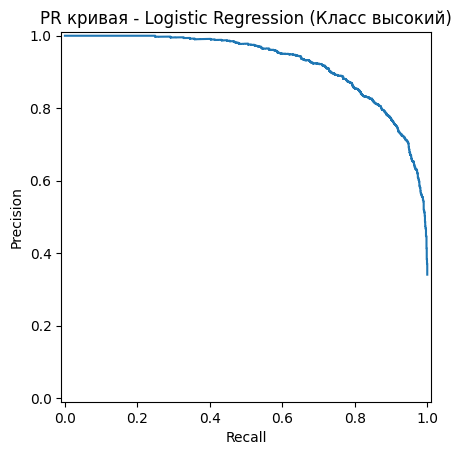

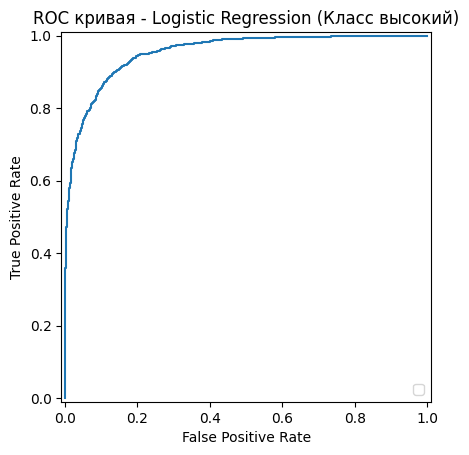

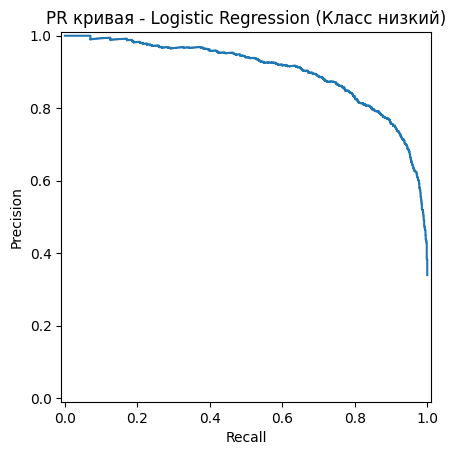

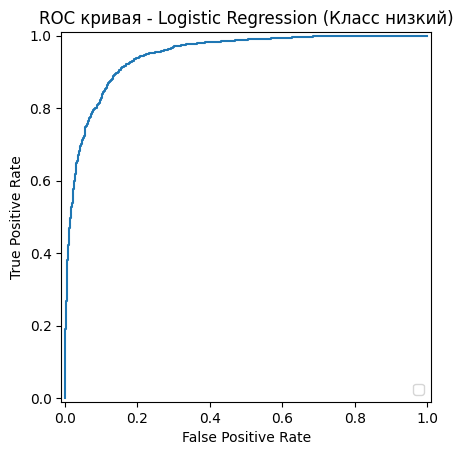

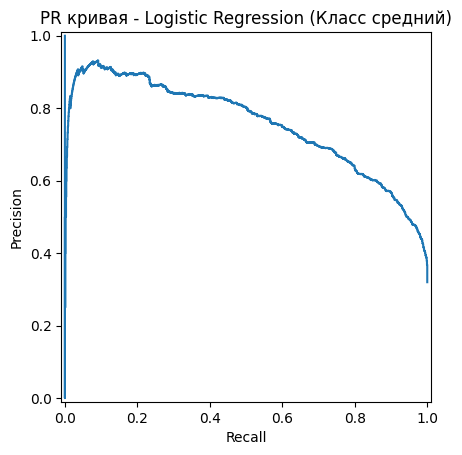

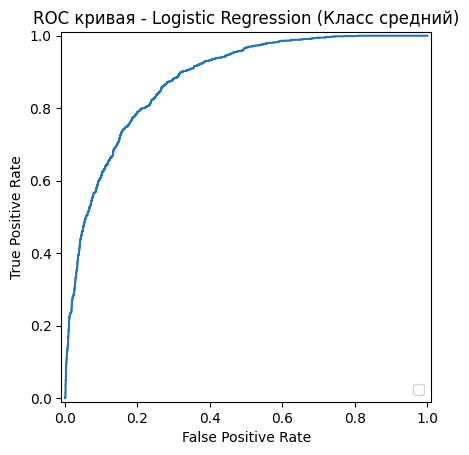

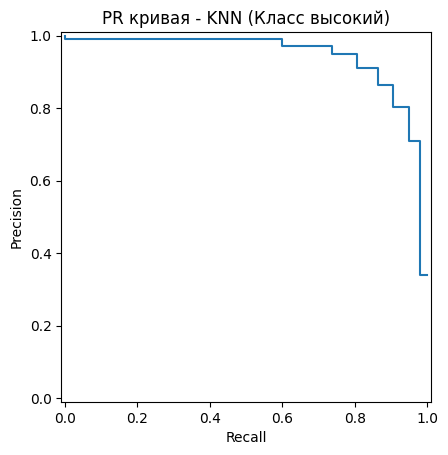

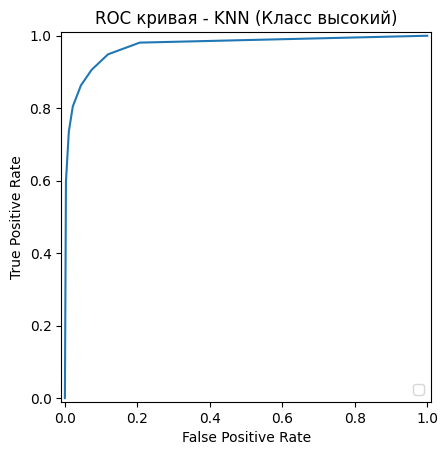

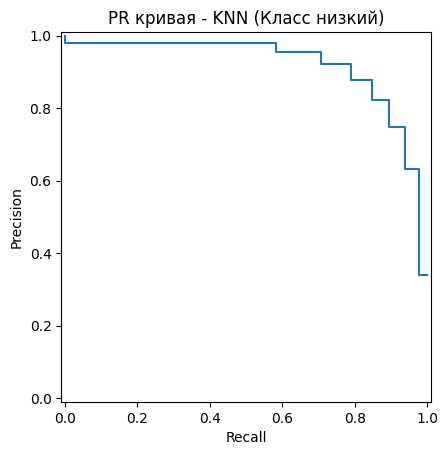

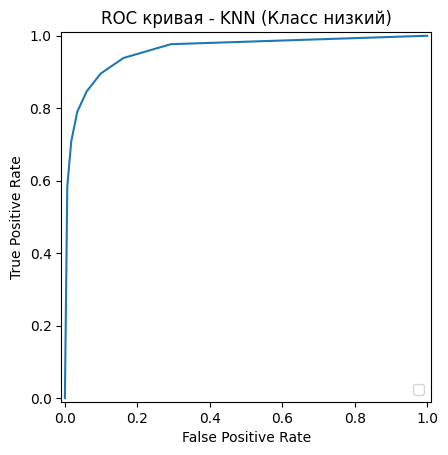

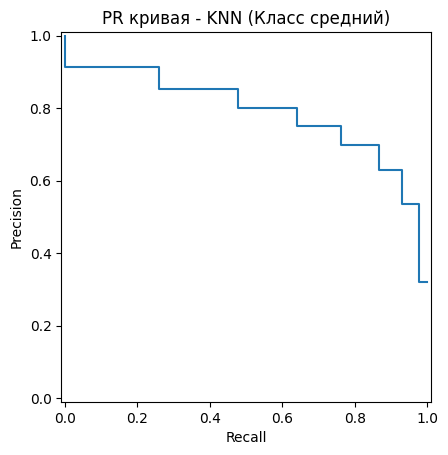

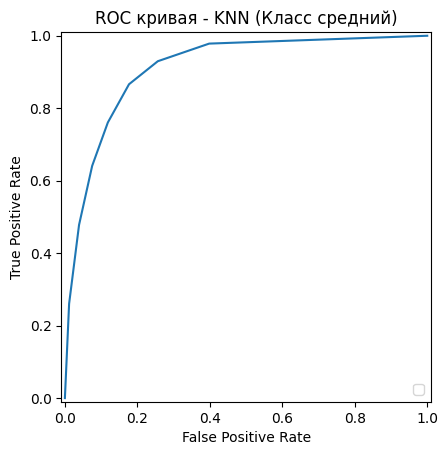

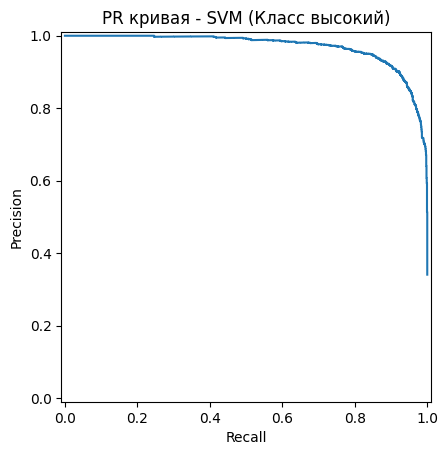

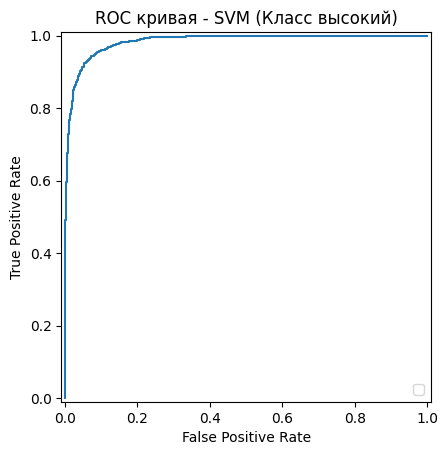

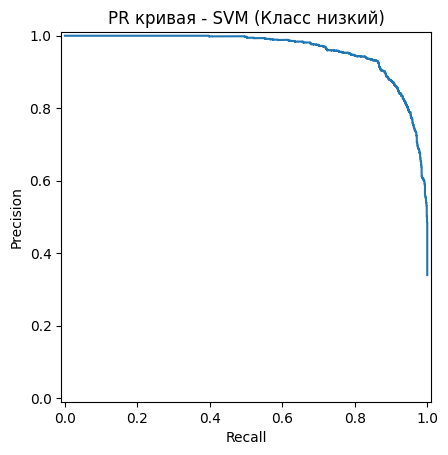

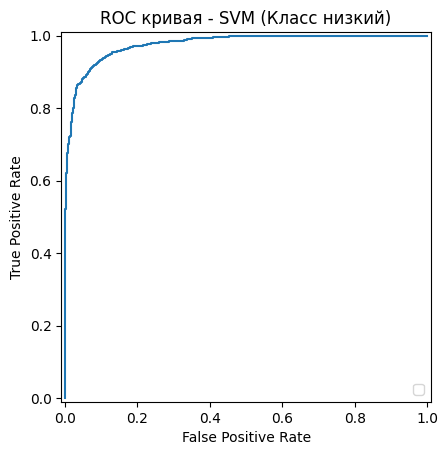

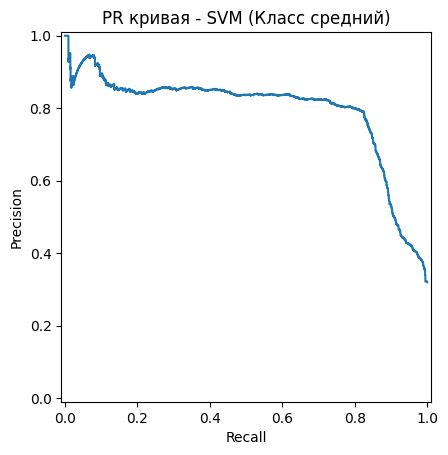

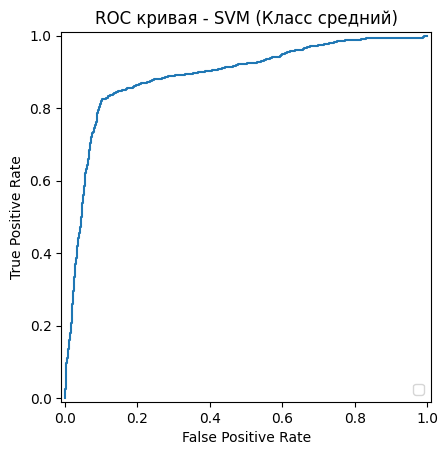

Logistic Regression PR-AUC: 0.86
Logistic Regression ROC-AUC: 0.93
KNN PR-AUC: 0.89
KNN ROC-AUC: 0.95
SVM PR-AUC: 0.91
SVM ROC-AUC: 0.95

Сравнение моделей:
Логистическая Регрессия - Accuracy: 0.78, F1: 0.78, PR-AUC: 0.91, ROC-AUC: 0.95
KNN - Accuracy: 0.83, F1: 0.84, PR-AUC: 0.91, ROC-AUC: 0.95
SVM - Accuracy: 0.87, F1: 0.87, PR-AUC: 0.91, ROC-AUC: 0.95


In [ ]:
# Оценка моделей на основе метрик accuracy, F1, confusion matrix
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print(f'F1 Логистической Регрессии: {f1_log_reg:.2f}')
print(f'Confusion Matrix Логистической Регрессии:\n{conf_matrix_log_reg}')


print(f'F1 K-ближайших соседей: {f1_knn:.2f}')
print(f'Confusion Matrix K-ближайших соседей:\n{conf_matrix_knn}')


print(f'F1 SVM: {f1_svm:.2f}')
print(f'Confusion Matrix SVM:\n{conf_matrix_svm}')

# Преобразование целевой переменной для многоклассовых метрик (бинаризация)
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# Построение PR и ROC кривых для каждой модели
models = {'Logistic Regression': best_log_reg, 'KNN': best_knn, 'SVM': best_svm}

for model_name, model in models.items():
    y_prob = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else model.decision_function(X_test)

    # Построение PR и ROC кривых для каждого класса
    for i in range(y_test_bin.shape[1]):
        # PR кривая
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
        PrecisionRecallDisplay(precision=precision, recall=recall).plot()
        plt.title(f'PR кривая - {model_name} (Класс {lb.classes_[i]})')
        plt.show()

        # ROC кривая
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
        plt.title(f'ROC кривая - {model_name} (Класс {lb.classes_[i]})')
        plt.show()

# Рассчет PR-AUC и ROC-AUC для каждой модели
for model_name, model in models.items():
    y_prob = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else model.decision_function(X_test)
    pr_auc = average_precision_score(y_test_bin, y_prob, average='weighted')
    roc_auc = roc_auc_score(y_test_bin, y_prob, average='weighted', multi_class='ovr')
    print(f'{model_name} PR-AUC: {pr_auc:.2f}')
    print(f'{model_name} ROC-AUC: {roc_auc:.2f}')

# Сравнение результатов моделей по всем метрикам
print("\nСравнение моделей:")
print(f'Логистическая Регрессия - Accuracy: {accuracy_log_reg:.2f}, F1: {f1_log_reg:.2f}, PR-AUC: {pr_auc:.2f}, ROC-AUC: {roc_auc:.2f}')
print(f'KNN - Accuracy: {accuracy_knn:.2f}, F1: {f1_knn:.2f}, PR-AUC: {pr_auc:.2f}, ROC-AUC: {roc_auc:.2f}')
print(f'SVM - Accuracy: {accuracy_svm:.2f}, F1: {f1_svm:.2f}, PR-AUC: {pr_auc:.2f}, ROC-AUC: {roc_auc:.2f}')